## Description About Columns Present In the Dataset.

- Description About Columns Present In the Dataset.

1. **Serial No.**: This is likely a unique identifier or serial number assigned to each entry in the dataset. It doesn't provide any meaningful information for predictive modeling and can usually be ignored during analysis.

2. **GRE Score**: The GRE (Graduate Record Examination) score is a standardized test score that measures a student's readiness for graduate-level education. It assesses skills in verbal reasoning, quantitative reasoning, and analytical writing. It's an important factor for admissions and can range from 130 to 170.

3. **TOEFL Score**: The TOEFL (Test of English as a Foreign Language) score measures an applicant's English language proficiency. It's especially important for international students. The TOEFL score can range from 0 to 120.

4. **University Rating**: This might represent the ranking or reputation of the university from which the applicant earned their previous degree. This could be on a scale of, for instance, 1 to 5.

5. **SOP (Statement of Purpose)**: SOP is a letter provided by the applicant explaining their goals, experiences, and motivations for pursuing a particular program. The quality of the SOP might be represented by a rating, possibly on a scale from 1 to 5.

6. **LOR (Letter of Recommendation)**: LORs are references provided by individuals who can vouch for the applicant's abilities and qualities. The rating might indicate the strength of these recommendations, typically ranging from 1 to 5.

7. **CGPA (Cumulative Grade Point Average)**: CGPA is a measure of a student's academic performance, calculated as the average of all course grades. It's usually on a scale of 0 to 4 or 5, depending on the institution.

8. **Research**: This binary variable indicates whether the applicant has research experience (1) or not (0). Research experience can be valuable, especially for research-oriented programs.

9. **Chance of Admit**: This is the target variable for your regression problem. It represents the likelihood or percentage chance that the applicant will be admitted to the program. This value will likely range between 0 and 1 (or 0% to 100%).

## Import All the libraries

In [62]:
# Import All the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
%matplotlib inline

In [16]:
#Load the dataset
df = pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [17]:
# Rename Columns
df.rename(columns = {'Chance of Admit ': 'ChanceOfAdmit','LOR ':'LOR'},inplace = True)

In [58]:
# Find Duplicate Values
df.duplicated().sum()

0

There is No Duplicate Present in this dataset

In [19]:
# Finding Null Values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
ChanceOfAdmit        0
dtype: int64

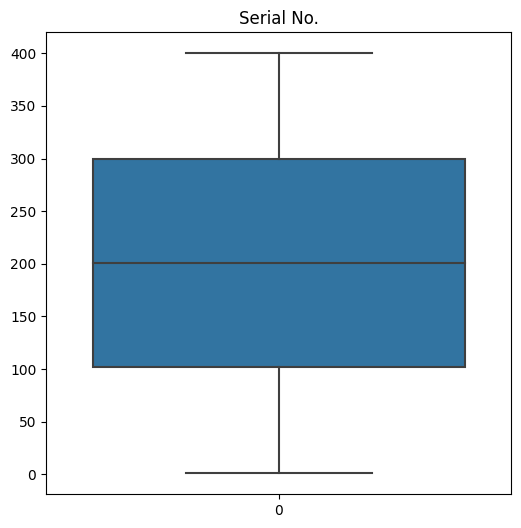

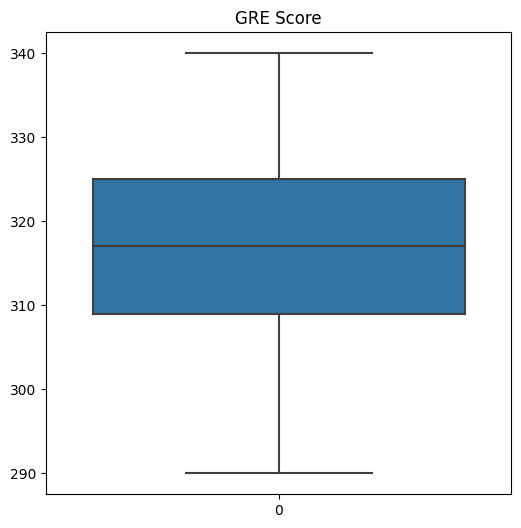

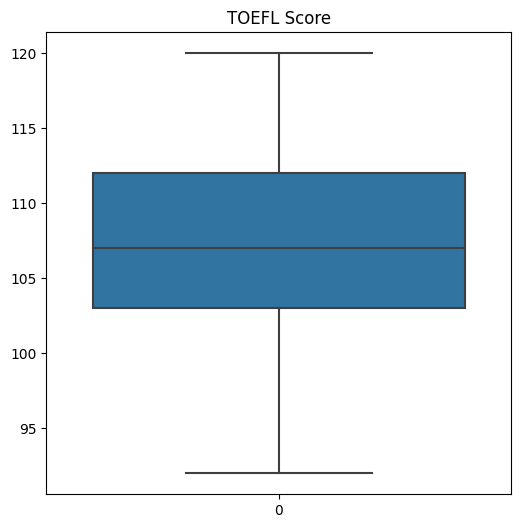

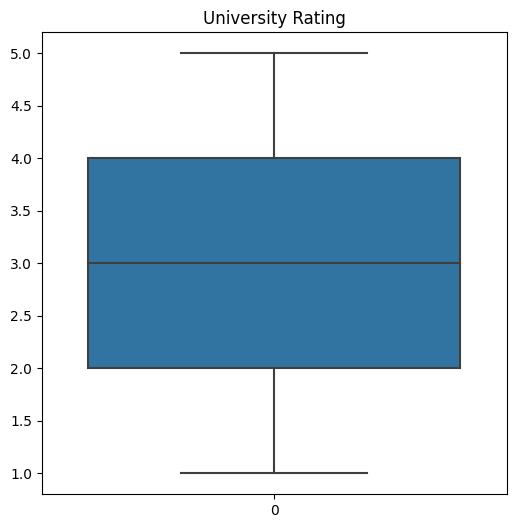

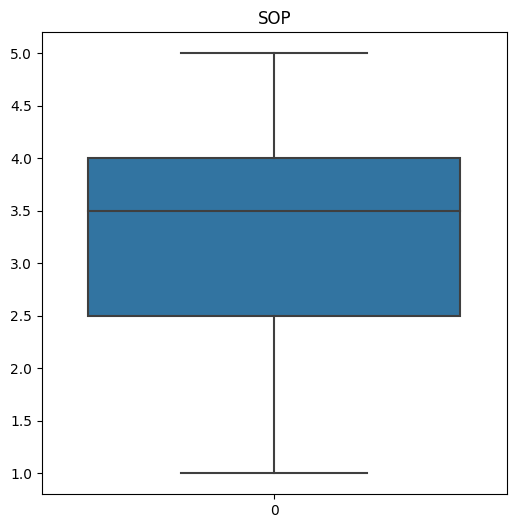

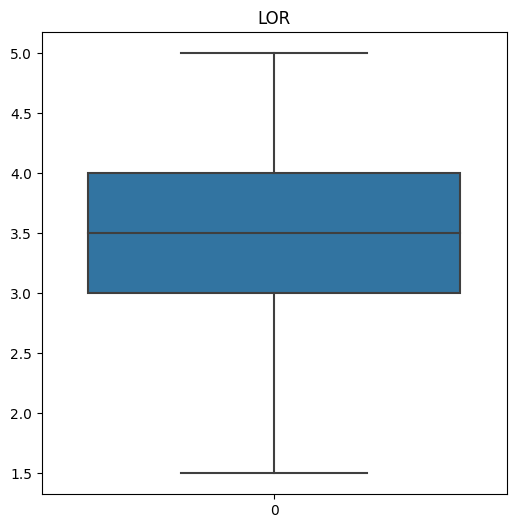

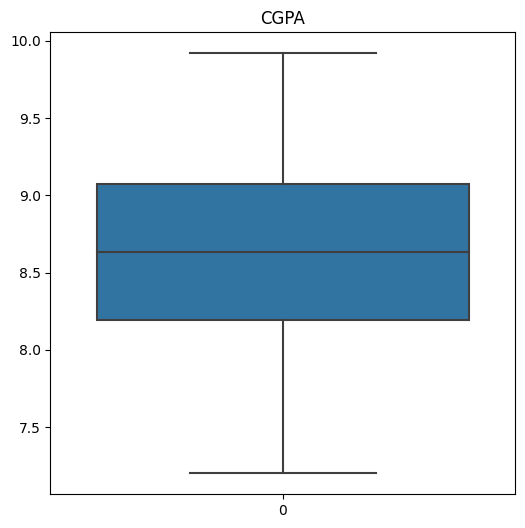

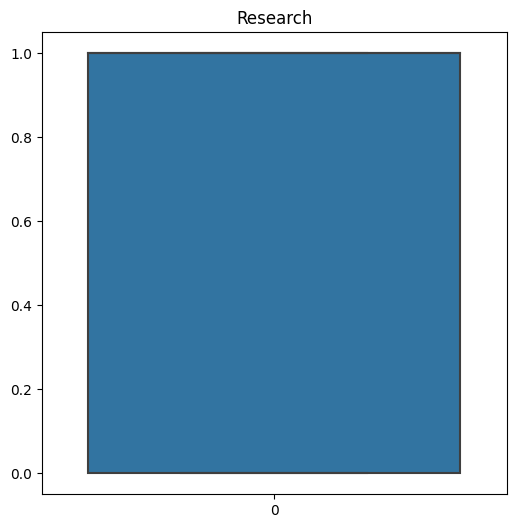

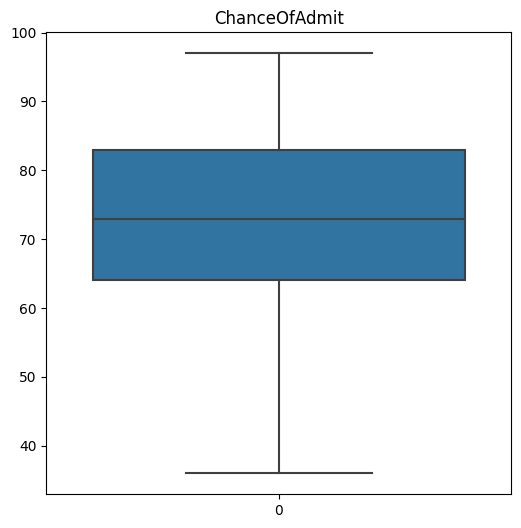

In [51]:
# Create BoxPlot For All the Columns To Find the Outliers
columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'ChanceOfAdmit']
for i in range(len(columns)):
    plt.figure(figsize=(6,6))
    x = columns[i]
    sns.boxplot(df[x])
    plt.title(columns[i])

In [22]:
df[df['ChanceOfAdmit'] == df['ChanceOfAdmit'].min()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
92,93,298,98,2,4.0,3.0,8.03,0,0.34
376,377,297,96,2,2.5,2.0,7.43,0,0.34


In [50]:
df[df['CGPA']== df['CGPA'].min()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,Class
28,29,295,93,1,2.0,2.0,7.2,0,46,1


In [49]:
# Drop The Outliers 
df.drop([92,376],inplace = True)
df.drop([347,58],inplace = True)

In [59]:
# Convert Chance of Admit into proper like in percentage
df['ChanceOfAdmit'] = df['ChanceOfAdmit'].apply(lambda a: a*100)
df['ChanceOfAdmit']= df['ChanceOfAdmit'].astype(int)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,Class
0,1,337,118,4,4.5,4.5,9.65,1,92,3
1,2,324,107,4,4.0,4.5,8.87,1,76,2
2,3,316,104,3,3.0,3.5,8.00,1,72,2
3,4,322,110,3,3.5,2.5,8.67,1,80,2
4,5,314,103,2,2.0,3.0,8.21,0,65,2
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,82,3
396,397,325,107,3,3.0,3.5,9.11,1,84,3
397,398,330,116,4,5.0,4.5,9.45,1,91,3
398,399,312,103,3,3.5,4.0,8.78,0,67,2


In [28]:
df['Class'] = df['ChanceOfAdmit'].apply(lambda a: 1 if a >= 25 and a <= 50 else 2 if a >=50 and a <=80 else 3)

I create a new column and then store 1,2 and 3 on the basis of percentage. I give 1 when the range of percentage is between 25 to 50 give 2 when range is 51 to 80 and 3 when range is 81 to 100. Beacaue the task is Classification but the target variable is in continuous So, I make my data for classification problem.
- Percentage = 25 - 50   class is 1
- percentage = 51 - 80   class is 2
- percentage = 81 - 100  class is 3

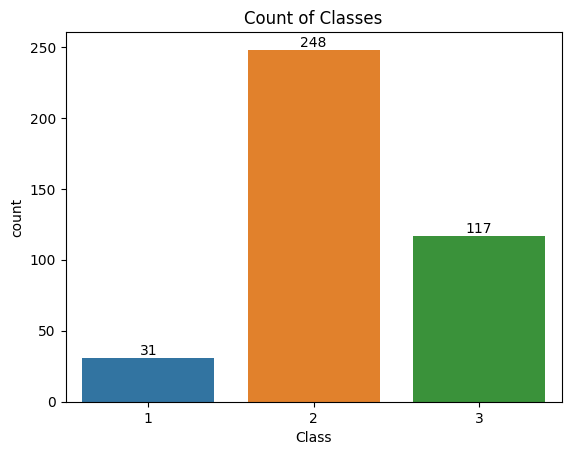

In [61]:
ax = sns.countplot(data = df,x = 'Class')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Count of Classes')
plt.show()

<Figure size 600x600 with 0 Axes>

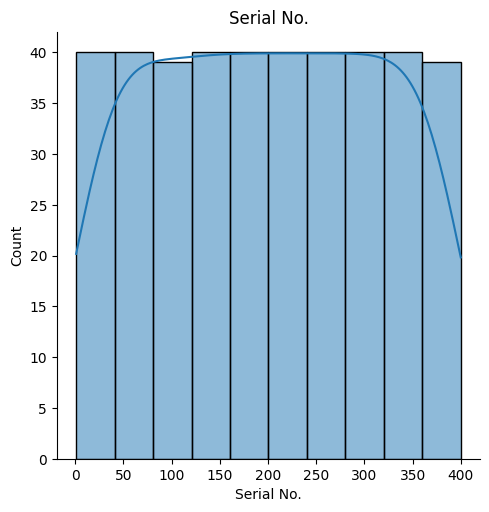

<Figure size 600x600 with 0 Axes>

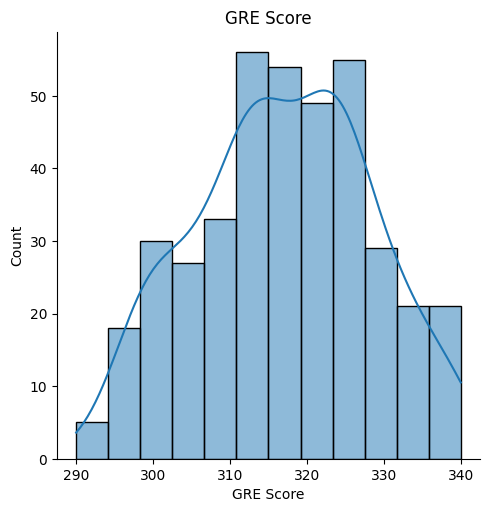

<Figure size 600x600 with 0 Axes>

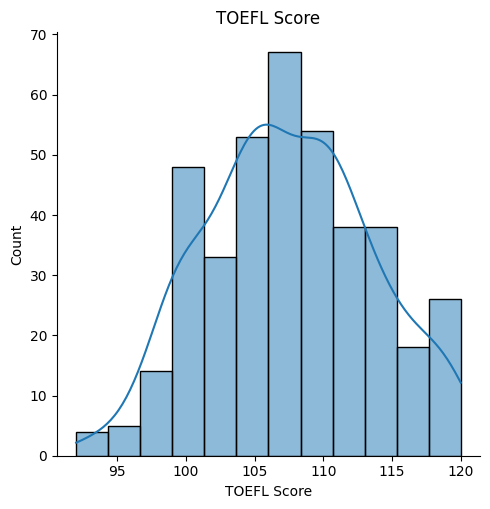

<Figure size 600x600 with 0 Axes>

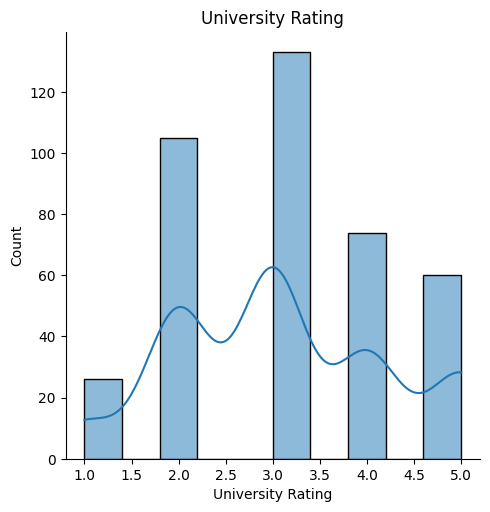

<Figure size 600x600 with 0 Axes>

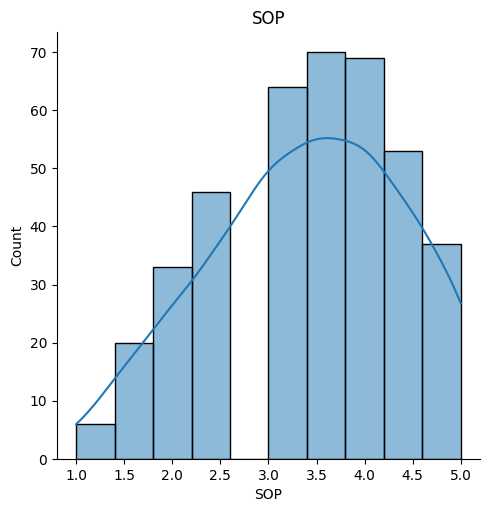

<Figure size 600x600 with 0 Axes>

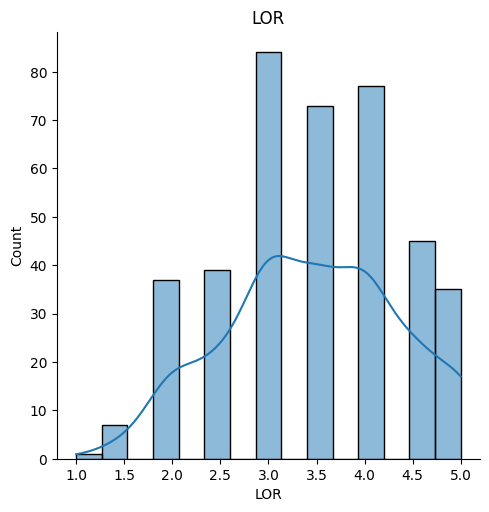

<Figure size 600x600 with 0 Axes>

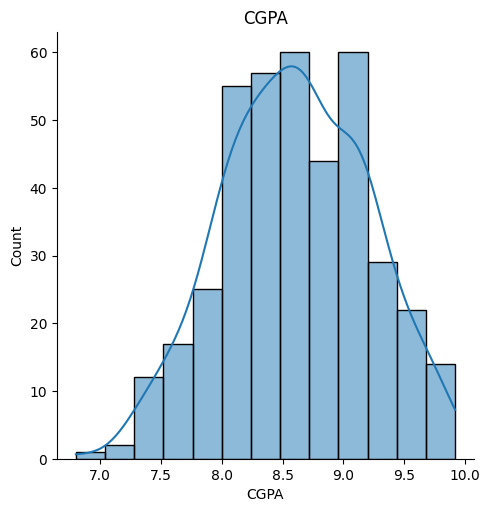

<Figure size 600x600 with 0 Axes>

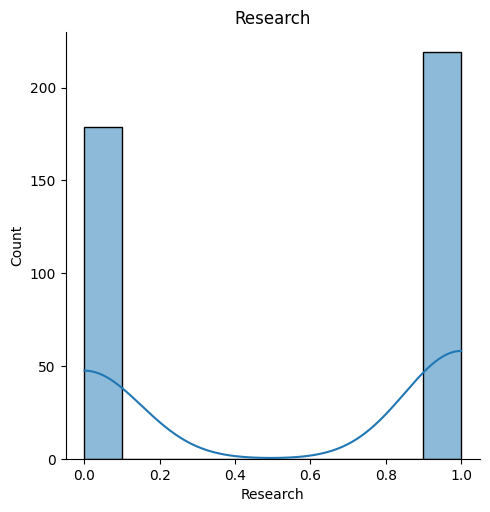

<Figure size 600x600 with 0 Axes>

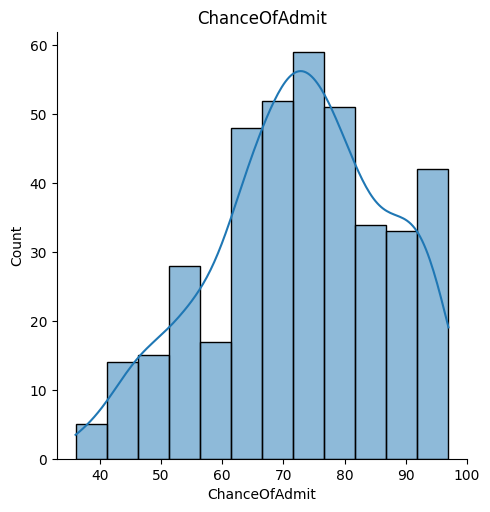

In [37]:
for i in range(len(columns)):
    plt.figure(figsize = (6,6))
    sns.displot(df[columns[i]],kde = True)
    plt.title(columns[i])

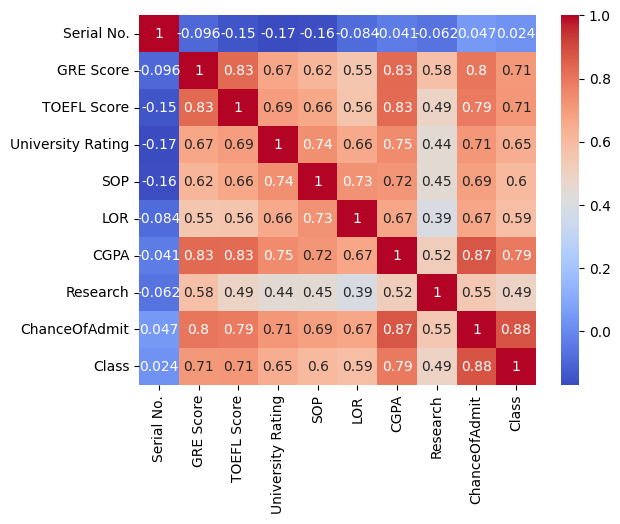

In [38]:
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.show()

In [52]:
x = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR','Research']]
y = df['Class']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 43)

In [54]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [55]:
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction,y_test)

0.8125

In [56]:
# Support Vector Machine
svm_class = svm.SVC(kernel = 'linear')
svm_class.fit(x_train,y_train)

SVC(kernel='linear')

In [57]:
svmp = svm_class.predict(x_test)
accuracy_score(svmp,y_test)

0.875

In [63]:
gs = GaussianNB()
gs.fit(x_train,y_train)

GaussianNB()

In [64]:
# Gaussian Naive Bayes
gs_prediction =  gs.predict(x_test)
accuracy_score(gs_prediction,y_test)

0.8

In [65]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [66]:
model_predict = model.predict(x_test)
accuracy_score(model_predict,y_test)

0.8125

**Conclusion of Machine Learning Model Performance Comparison**

After conducting a comprehensive study and analysis of various machine learning models, the following conclusions can be drawn based on the reported accuracies:

1. **Support Vector Machine (SVM):** The SVM model exhibited the highest accuracy among all the models tested, achieving an accuracy of 87.2%. This suggests that SVM is particularly effective in distinguishing between different classes within the dataset and is capable of capturing complex decision boundaries.

2. **Logistic Regression:** The Logistic Regression model achieved an accuracy of 81%. While its accuracy is not as high as that of SVM, it still performs well. Logistic Regression is a simple and interpretable algorithm, making it suitable for scenarios where model interpretability is important.

3. **Decision Tree:** The Decision Tree model yielded an accuracy of 81.27%. While its accuracy is competitive, it's worth noting that Decision Trees might have limitations when dealing with complex relationships within the data. However, they are easy to visualize and understand, which can be valuable for explaining model predictions.

4. **Naive Bayes:** The Naive Bayes model produced an accuracy of 80%. Although it has the lowest accuracy among the models tested, Naive Bayes is known for its simplicity and efficiency, especially in text classification and other similar tasks. It assumes independence between features, which might not always hold in more intricate datasets.
